# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_csv('/kaggle/input/hotel-bookings-2/hotel_bookings 2.csv')

# Exploratory Data Analysis and Data Cleaning

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
"""From above the "reservation_status_date  --- object " data type is object. So, We need to change it
to "date_time" datatype.
"""
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format= 'mixed')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
df.describe(include = 'object')

In [ ]:
#Creating a for loop for the unique objects to

for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

In [ ]:
#checking missing values and sum of missing values
df.isnull().sum()

In [ ]:
df.drop(['company', 'agent'], axis= 1, inplace = True)

#To remove the rows with the missing values we can simply use the following code
df.dropna(inplace = True)  #inplace = true is used to make changes in the original dataframe

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df = df[df['adr']< 5000]

In [ ]:
df.describe()

# Data Analysis and Visualization

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


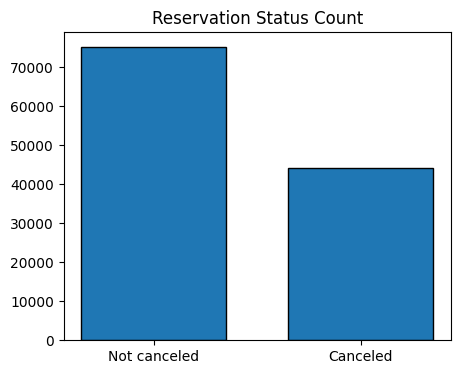

In [8]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True) # "normalize = True" gives the percentage
print(cancelled_perc)

plt.figure(figsize = (5, 4))
plt.title('Reservation Status Count')
plt.bar(['Not canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

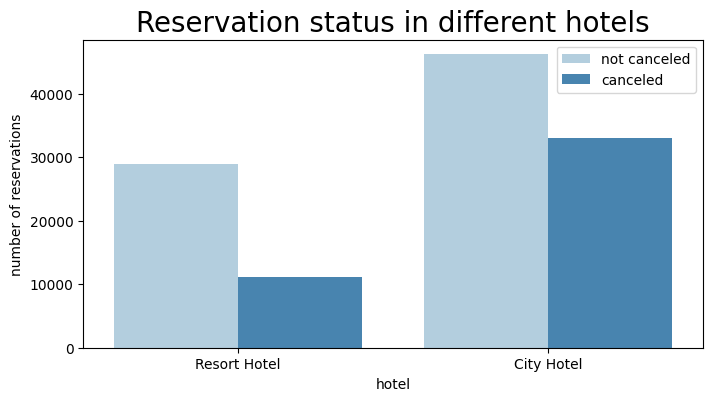

In [9]:
plt.figure(figsize= (8, 4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
legend_labels = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels', size =20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

In [10]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [11]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

In [13]:
# Now we see if Price is a variable for calcellation of bookings

resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

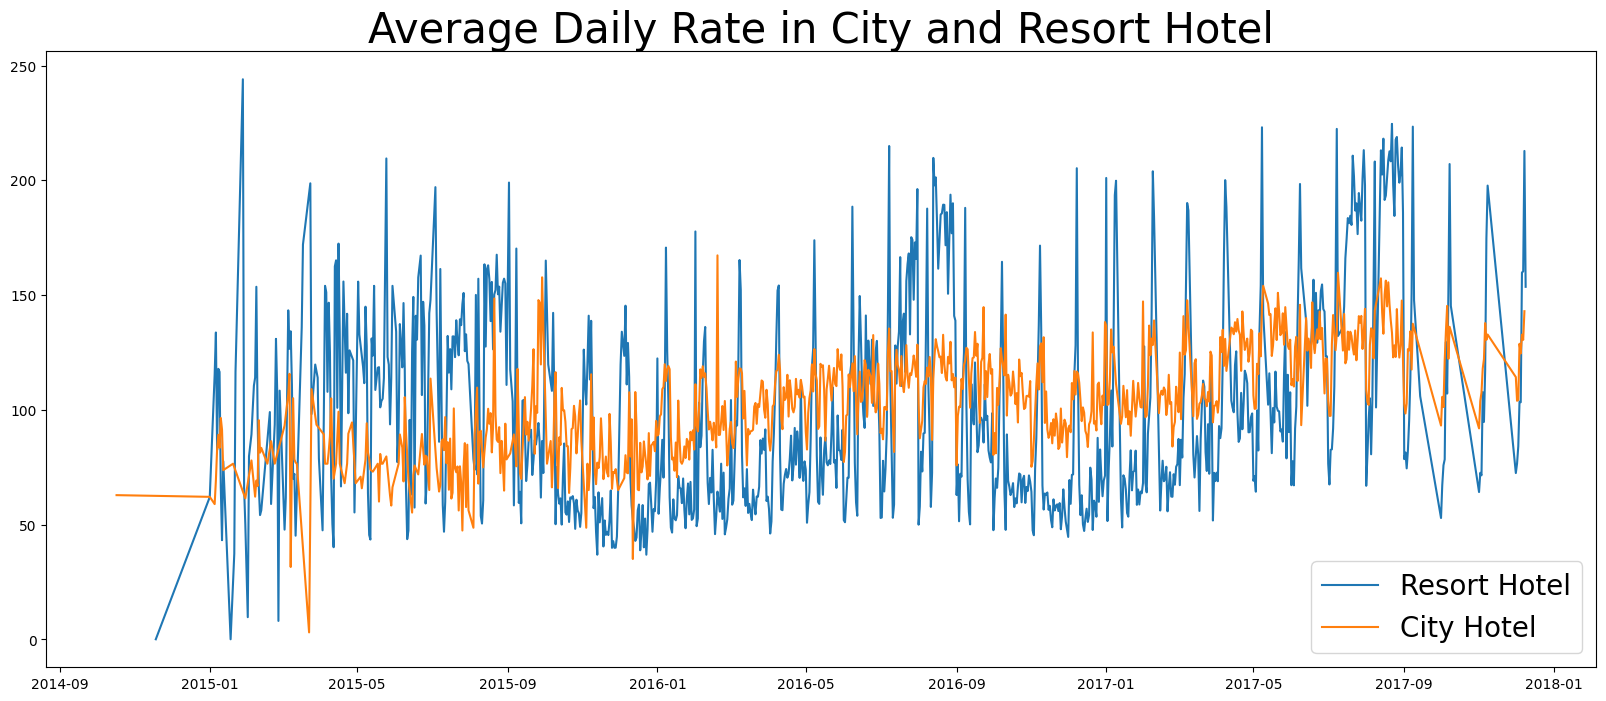

In [14]:
plt.figure(figsize = (20, 8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize =30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

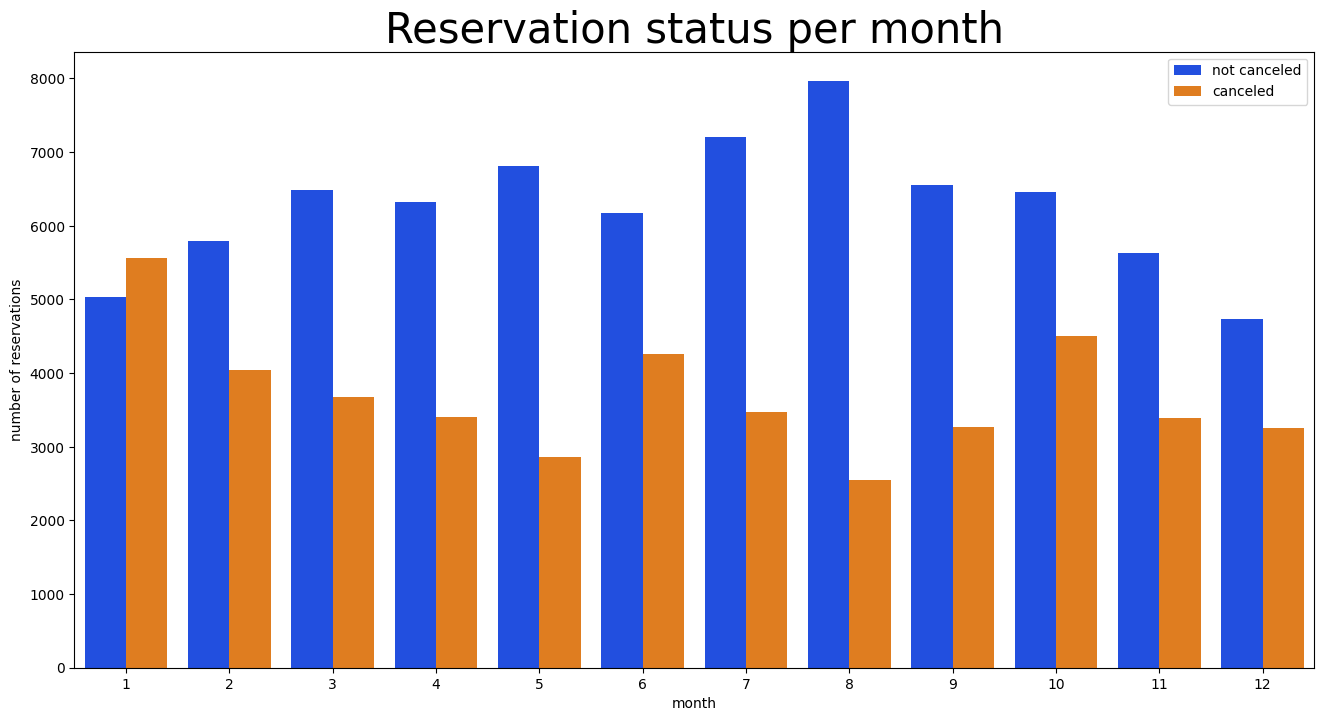

In [15]:
# finding which month has maximum reservations and which month has maximum cancellations
df['month']= df['reservation_status_date'].dt.month

plt.figure(figsize =(16, 8))
ax1 = sns.countplot(x= 'month', hue = 'is_canceled', data = df, palette = 'bright')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size =30)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

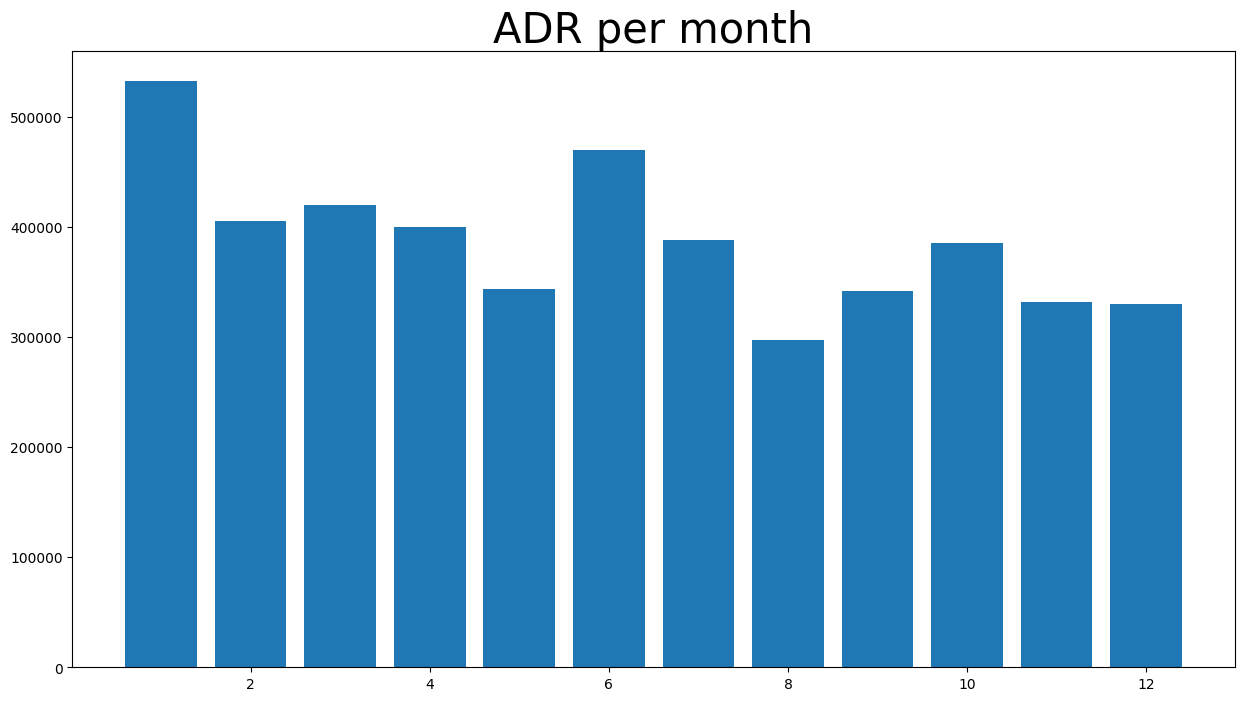

In [16]:
#plotting the average daily rate
df1 = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()
plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize= 30)
plt.bar('month', 'adr' , data = df1)
plt.show()

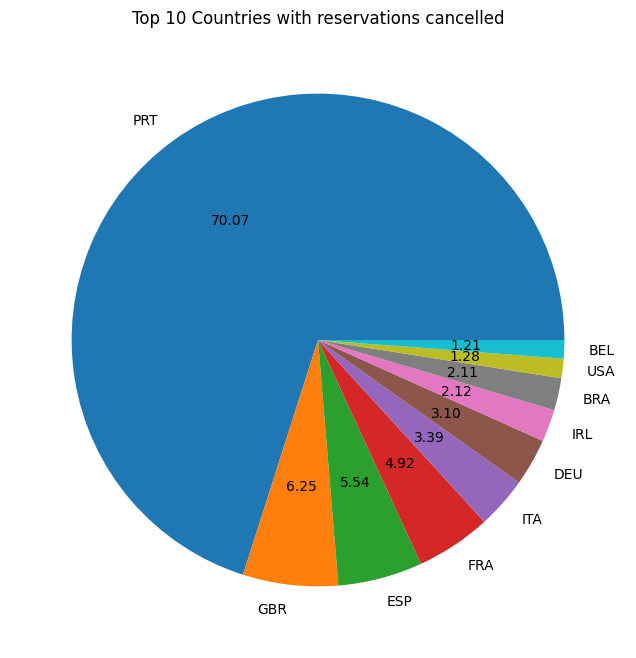

In [17]:
#checking the cancellation based on country
cancelled_data = df[df['is_canceled']== 1]
top_10_countries = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize= (8, 8))
plt.title('Top 10 Countries with reservations cancelled')
plt.pie(top_10_countries, autopct = '%.2f', labels = top_10_countries.index)
plt.show()

In [18]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [19]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [20]:
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.468954
Groups           0.273539
Offline TA/TO    0.187930
Direct           0.043732
Corporate        0.022431
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64

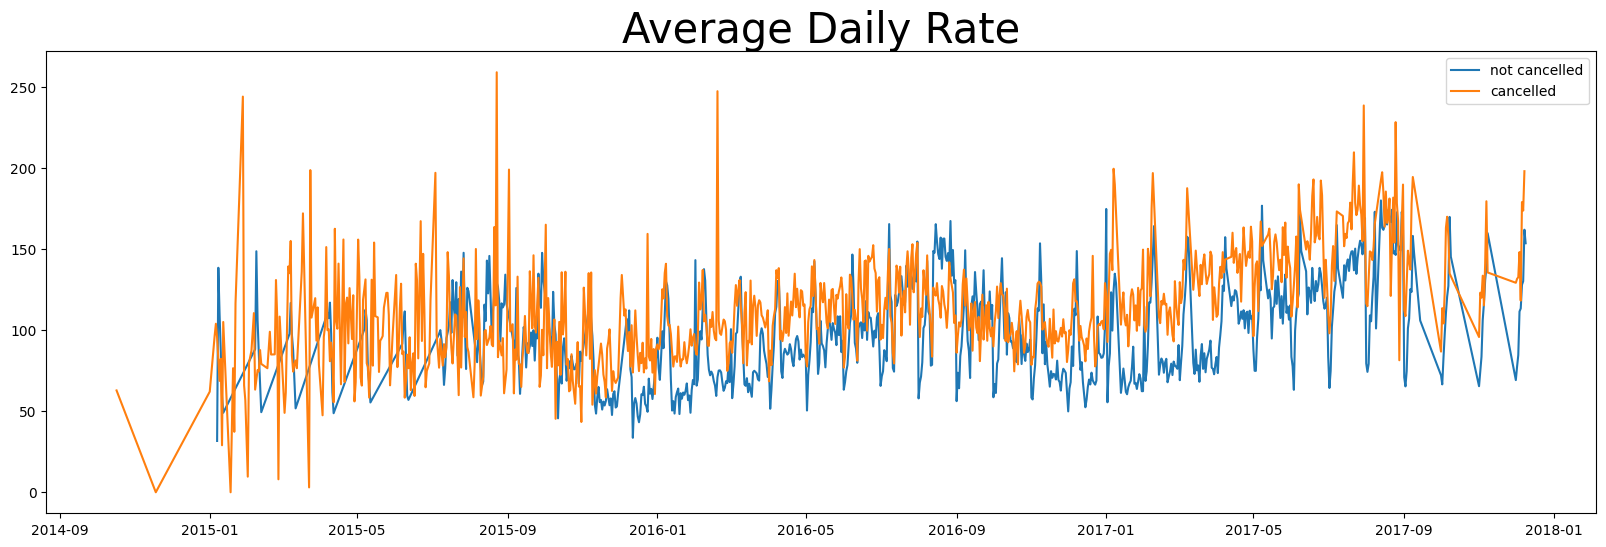

In [21]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date') [['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled']== 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean() 
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()